In [1]:
import scipy.io as spio
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import numpy as np

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# sub-01/ses-test Data (Threshold=500)

In [2]:
fmri_mask=spio.loadmat('fMRImask500.mat')
label=spio.loadmat('label.mat')
fmri_ROI=fmri_mask['fMRIdata_1D_ROI']
label=label['label']

In [3]:
fmri_ROI_df=pd.DataFrame(fmri_ROI)
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15173,15174,15175,15176,15177,15178,15179,15180,15181,15182
0,621,936,890,990,918,624,941,1022,1004,702,...,1900,3146,2071,2423,2015,2329,2268,1747,1765,1437
1,526,809,795,851,819,533,858,935,903,611,...,1077,1888,1302,1412,1154,1402,1357,1065,1117,930
2,539,826,798,869,829,548,856,946,921,609,...,971,1710,1184,1287,1067,1287,1233,983,1014,853
3,537,828,811,865,832,563,855,939,924,624,...,951,1639,1188,1293,1055,1313,1251,974,1022,843
4,525,806,780,866,822,532,833,910,904,599,...,950,1636,1188,1278,1043,1330,1252,976,1042,859


In [4]:
fmri_ROI_df['label']=label
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15174,15175,15176,15177,15178,15179,15180,15181,15182,label
0,621,936,890,990,918,624,941,1022,1004,702,...,3146,2071,2423,2015,2329,2268,1747,1765,1437,1
1,526,809,795,851,819,533,858,935,903,611,...,1888,1302,1412,1154,1402,1357,1065,1117,930,1
2,539,826,798,869,829,548,856,946,921,609,...,1710,1184,1287,1067,1287,1233,983,1014,853,1
3,537,828,811,865,832,563,855,939,924,624,...,1639,1188,1293,1055,1313,1251,974,1022,843,1
4,525,806,780,866,822,532,833,910,904,599,...,1636,1188,1278,1043,1330,1252,976,1042,859,2


## SVM only

The hightest score: 0.8478260869565217
The corresponding C: 0.01


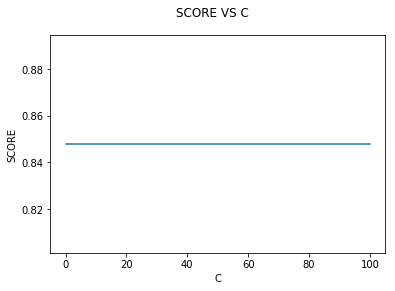

In [8]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']

scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=100)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

The hightest score: 0.8478260869565217
The corresponding C: 0.01


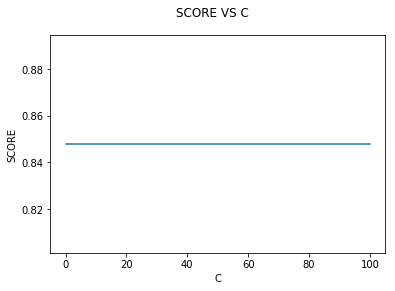

In [9]:
scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=0.01)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

In [10]:
scores=[]
index=[]
# save all scores of random state within range [10,150) 
for i in range(1,150):
    train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=i)
    X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_train=train['label']
    X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_test=test['label']
    clf=SVC(kernel='linear',C=0.01,gamma=100)
    clf.fit(X_train,y_train)
    index.append(i)
    scores.append(clf.score(X_test,y_test))



Text(0,0.5,'SCORE')

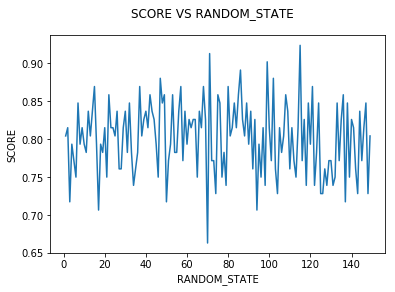

In [11]:
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS RANDOM_STATE')
plt.xlabel('RANDOM_STATE')
plt.ylabel('SCORE')

In [12]:
print('The hightest score:',max(scores))
print('The corresponding random state:',index[np.argmax(scores)])

The hightest score: 0.9239130434782609
The corresponding random state: 115


In [13]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=115)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']


In [14]:
clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train,y_train)

svm_pred=clf.predict(X_test)
print('Accuracy of the best:',clf.score(X_test,y_test))

Accuracy of the best: 0.9239130434782609


In [15]:
print(confusion_matrix(y_test,svm_pred))

[[44  2  0  1]
 [ 2 13  0  0]
 [ 2  0 10  0]
 [ 0  0  0 18]]


In [16]:
print('Predict Label:',svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 4 4 4 3 1 4 1 2 1 4 2 1 1 1 4 1 3 2 2 4 1 3 2 2 1 1 2 3 1 1 1 1 4 2 1 4
 1 1 1 1 1 1 1 1 1 1 1 4 3 1 1 1 3 3 1 1 1 4 3 1 1 1 1 1 4 1 2 2 2 4 3 1 1
 2 1 4 3 4 2 1 4 4 4 2 1 1 1 4 1 1 2]
Real Label: [2 4 4 4 3 3 4 1 2 1 4 2 1 1 1 4 1 3 2 1 4 1 3 2 2 1 1 2 3 1 1 1 1 4 2 1 4
 1 1 1 1 1 1 1 1 1 1 2 4 3 1 1 1 3 3 1 1 1 4 3 1 1 1 1 1 4 1 1 2 2 4 3 1 1
 2 1 1 3 4 2 1 4 4 4 2 1 1 1 4 1 3 2]


## PCA+SVM

In [17]:
# Standardizing the features
scale=StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [18]:
scores=[]
index=[]
# save all scores of the number of dimensionality reduction within range [10,150) 
for i in range(10,150):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca= pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf2=SVC(kernel='linear',C=0.01,gamma=0.01)
    clf2.fit(X_train_pca,y_train)
    
    
    index.append(i)
    scores.append(clf2.score(X_test_pca,y_test))
    


Text(0,0.5,'SCORE')

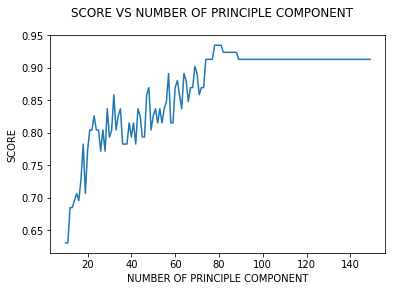

In [19]:
fig=plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS NUMBER OF PRINCIPLE COMPONENT')
plt.xlabel('NUMBER OF PRINCIPLE COMPONENT')
plt.ylabel('SCORE')

In [20]:
print('The hightest score:',max(scores))
print('The corresponding number of principle component:',index[np.argmax(scores)])

The hightest score: 0.9347826086956522
The corresponding number of principle component: 78


In [21]:
pca = PCA(n_components=78)
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train_pca,y_train)

svm_pred2=clf.predict(X_test_pca)
print('Accuracy of the best:',clf.score(X_test_pca,y_test))

pca_svm_pred=clf.predict(X_test_pca)

Accuracy of the best: 0.9347826086956522


In [22]:
print(confusion_matrix(y_test,pca_svm_pred))

[[46  1  0  0]
 [ 3 12  0  0]
 [ 2  0 10  0]
 [ 0  0  0 18]]


In [23]:
print('Predict Label:',pca_svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 4 4 4 3 3 4 1 2 1 4 2 1 1 1 4 1 3 2 2 4 1 3 2 2 1 1 2 3 1 1 1 1 4 2 1 4
 1 1 1 1 1 1 1 1 1 1 2 4 3 1 1 1 3 1 1 1 1 4 3 1 1 1 1 1 4 1 1 2 2 4 3 1 1
 2 1 1 3 4 1 1 4 4 4 1 1 1 1 4 1 1 2]
Real Label: [2 4 4 4 3 3 4 1 2 1 4 2 1 1 1 4 1 3 2 1 4 1 3 2 2 1 1 2 3 1 1 1 1 4 2 1 4
 1 1 1 1 1 1 1 1 1 1 2 4 3 1 1 1 3 3 1 1 1 4 3 1 1 1 1 1 4 1 1 2 2 4 3 1 1
 2 1 1 3 4 2 1 4 4 4 2 1 1 1 4 1 3 2]


# sub-01/ses-test Data (Threshold=800)

In [24]:
fmri_mask=spio.loadmat('fMRImask800.mat')
label=spio.loadmat('label.mat')
fmri_ROI=fmri_mask['fMRIdata_1D_ROI']
label=label['label']

In [25]:
fmri_ROI_df=pd.DataFrame(fmri_ROI)
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13637,13638,13639,13640,13641,13642,13643,13644,13645,13646
0,990,941,1022,1004,1238,1380,1412,1199,933,1245,...,2586,1686,3152,2066,1554,2924,1900,3146,2071,2268
1,851,858,935,903,1120,1242,1269,1118,898,1079,...,1684,997,1897,1300,981,1726,1077,1888,1302,1357
2,869,856,946,921,1107,1245,1262,1106,886,1082,...,1529,923,1721,1205,914,1642,971,1710,1184,1233
3,865,855,939,924,1101,1243,1252,1104,893,1089,...,1454,974,1688,1245,966,1663,951,1639,1188,1251
4,866,833,910,904,1086,1224,1258,1094,868,1086,...,1447,976,1697,1242,984,1677,950,1636,1188,1252


In [26]:
fmri_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 13647 entries, 0 to 13646
dtypes: uint16(13647)
memory usage: 4.8 MB


In [27]:
fmri_ROI_df['label']=label
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13638,13639,13640,13641,13642,13643,13644,13645,13646,label
0,990,941,1022,1004,1238,1380,1412,1199,933,1245,...,1686,3152,2066,1554,2924,1900,3146,2071,2268,1
1,851,858,935,903,1120,1242,1269,1118,898,1079,...,997,1897,1300,981,1726,1077,1888,1302,1357,1
2,869,856,946,921,1107,1245,1262,1106,886,1082,...,923,1721,1205,914,1642,971,1710,1184,1233,1
3,865,855,939,924,1101,1243,1252,1104,893,1089,...,974,1688,1245,966,1663,951,1639,1188,1251,1
4,866,833,910,904,1086,1224,1258,1094,868,1086,...,976,1697,1242,984,1677,950,1636,1188,1252,2


## SVM only

The hightest score: 0.8152173913043478
The corresponding C: 0.01


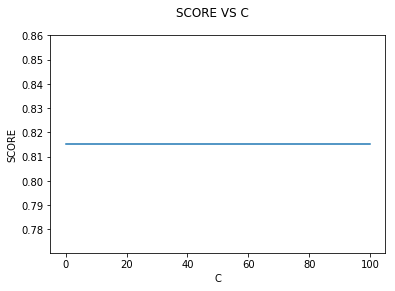

In [34]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']

scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=100)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

The hightest score: 0.8152173913043478
The corresponding C: 0.01


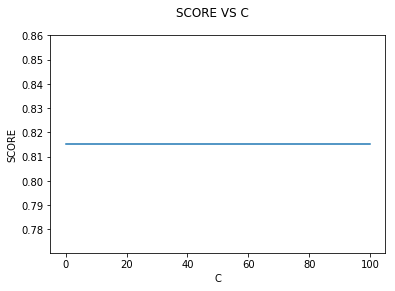

In [35]:
scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=0.01)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

In [30]:
scores=[]
index=[]
# save all scores of random state within range [1,150) 
for i in range(1,150):
    train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=i)
    X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_train=train['label']
    X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_test=test['label']
    clf=SVC(kernel='linear',C=0.01,gamma=0.01)
    clf.fit(X_train,y_train)
    index.append(i)
    scores.append(clf.score(X_test,y_test))

Text(0,0.5,'SCORE')

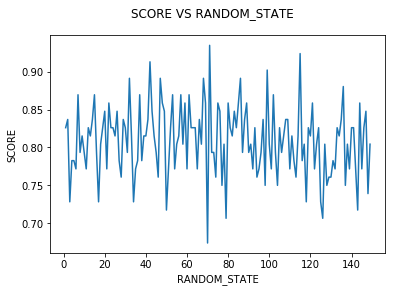

In [31]:
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS RANDOM_STATE')
plt.xlabel('RANDOM_STATE')
plt.ylabel('SCORE')

In [32]:
print('The hightest score:',max(scores))
print('The corresponding random state:',index[np.argmax(scores)])

The hightest score: 0.9347826086956522
The corresponding random state: 71


In [36]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=71)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']

In [37]:
clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train,y_train)

svm_pred=clf.predict(X_test)
print('Accuracy of the best:',clf.score(X_test,y_test))

Accuracy of the best: 0.9347826086956522


In [38]:
print(confusion_matrix(y_test,svm_pred))

[[48  1  1  0]
 [ 4 10  0  0]
 [ 0  0 13  0]
 [ 0  0  0 15]]


In [39]:
print('Predict Label:',svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 2 1 4 1 1 3 2 1 3 4 1 2 3 1 1 3 4 1 1 2 1 4 4 2 1 2 3 1 1 1 1 1 1 1 1 1
 3 4 1 4 1 1 2 1 4 3 1 1 1 3 1 4 1 1 4 1 2 1 3 1 1 4 1 1 2 1 3 4 4 1 1 1 4
 1 1 1 1 3 1 4 1 3 2 3 1 1 3 1 1 2 1]
Real Label: [1 2 1 4 1 1 3 2 1 3 4 1 2 3 1 1 3 4 1 1 2 2 4 4 2 1 2 3 2 1 1 1 1 1 1 2 1
 3 4 1 4 1 1 2 1 4 3 1 1 1 3 1 4 1 1 4 1 1 1 3 1 2 4 1 1 2 1 3 4 4 1 1 1 4
 1 1 1 1 3 1 4 1 3 2 3 1 1 1 1 1 2 1]


## PCA+SVM

In [40]:
# Standardizing the features
scale=StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [41]:
scores=[]
index=[]
# save all scores of the number of dimensionality reduction within range [10,150) 
for i in range(10,150):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca= pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf=SVC(kernel='linear',C=0.01,gamma=0.01)
    clf.fit(X_train_pca,y_train)
    
    
    index.append(i)
    scores.append(clf.score(X_test_pca,y_test))

Text(0,0.5,'SCORE')

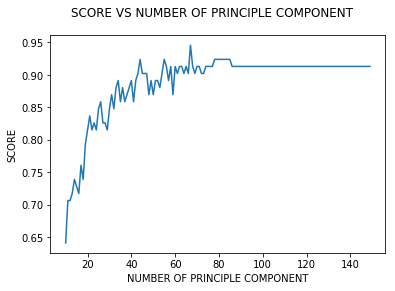

In [42]:
fig=plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS NUMBER OF PRINCIPLE COMPONENT')
plt.xlabel('NUMBER OF PRINCIPLE COMPONENT')
plt.ylabel('SCORE')

In [43]:
print('The hightest score:',max(scores))
print('The corresponding number of principle component:',index[np.argmax(scores)])

The hightest score: 0.9456521739130435
The corresponding number of principle component: 67


In [44]:
pca = PCA(n_components=67)
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train_pca,y_train)

print('Accuracy of the best:',clf.score(X_test_pca,y_test))

pca_svm_pred=clf.predict(X_test_pca)

Accuracy of the best: 0.9239130434782609


In [45]:
print(confusion_matrix(y_test,pca_svm_pred))

[[49  1  0  0]
 [ 6  8  0  0]
 [ 0  0 13  0]
 [ 0  0  0 15]]


In [46]:
print('Predict Label:',pca_svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 2 1 4 1 1 3 1 1 3 4 1 1 3 1 1 3 4 1 1 2 1 4 4 2 1 2 3 1 1 1 1 1 1 1 1 1
 3 4 1 4 1 1 2 1 4 3 1 1 1 3 1 4 1 1 4 1 2 1 3 1 1 4 1 1 2 1 3 4 4 1 1 1 4
 1 1 1 1 3 1 4 1 3 2 3 1 1 1 1 1 2 1]
Real Label: [1 2 1 4 1 1 3 2 1 3 4 1 2 3 1 1 3 4 1 1 2 2 4 4 2 1 2 3 2 1 1 1 1 1 1 2 1
 3 4 1 4 1 1 2 1 4 3 1 1 1 3 1 4 1 1 4 1 1 1 3 1 2 4 1 1 2 1 3 4 4 1 1 1 4
 1 1 1 1 3 1 4 1 3 2 3 1 1 1 1 1 2 1]


# sub-01/ses-retest Data (Threshold=500)

In [47]:
fmri_mask=spio.loadmat('refMRImask500.mat')
label=spio.loadmat('label.mat')
fmri_ROI=fmri_mask['fMRIdata_1D_ROI']
label=label['label']

In [48]:
fmri_ROI_df=pd.DataFrame(fmri_ROI)
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887
0,715,760,712,1151,1391,1398,1229,1057,597,997,...,2485,2157,1406,1747,1013,1408,1073,1772,953,1038
1,680,738,660,1070,1283,1281,1090,954,564,933,...,1357,1213,850,1027,726,919,692,1106,662,704
2,671,709,662,1070,1273,1267,1110,953,579,935,...,1259,1127,794,952,670,853,634,1008,632,648
3,668,702,640,1039,1268,1281,1121,955,579,946,...,1221,1087,720,881,696,842,651,1008,613,665
4,639,676,624,1052,1261,1267,1109,934,572,960,...,1260,1107,730,879,695,863,667,1029,602,696


In [49]:
fmri_ROI_df['label']=label
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15879,15880,15881,15882,15883,15884,15885,15886,15887,label
0,715,760,712,1151,1391,1398,1229,1057,597,997,...,2157,1406,1747,1013,1408,1073,1772,953,1038,1
1,680,738,660,1070,1283,1281,1090,954,564,933,...,1213,850,1027,726,919,692,1106,662,704,1
2,671,709,662,1070,1273,1267,1110,953,579,935,...,1127,794,952,670,853,634,1008,632,648,1
3,668,702,640,1039,1268,1281,1121,955,579,946,...,1087,720,881,696,842,651,1008,613,665,1
4,639,676,624,1052,1261,1267,1109,934,572,960,...,1107,730,879,695,863,667,1029,602,696,2


## SVM only

The hightest score: 0.717391304347826
The corresponding C: 0.01


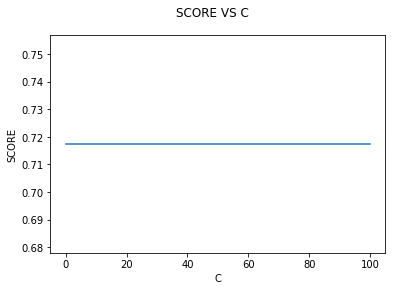

In [54]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']

scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=100)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

The hightest score: 0.717391304347826
The corresponding C: 0.01


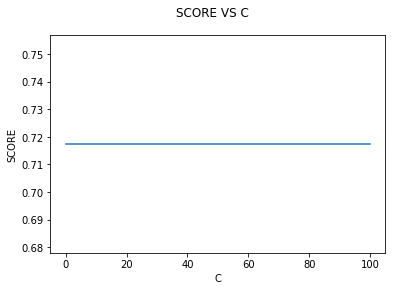

In [55]:
scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=0.01)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

In [56]:
scores=[]
index=[]
# save all scores of random state within range [1,150) 
for i in range(1,150):
    train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=i)
    X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_train=train['label']
    X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_test=test['label']
    clf=SVC(kernel='linear',C=0.01,gamma=0.01)
    clf.fit(X_train,y_train)
    index.append(i)
    scores.append(clf.score(X_test,y_test))

Text(0,0.5,'SCORE')

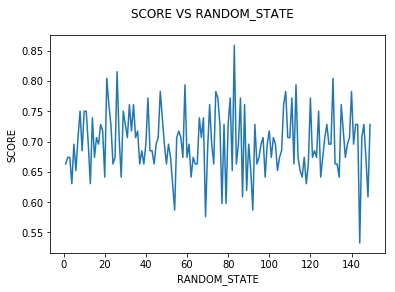

In [57]:
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS RANDOM_STATE')
plt.xlabel('RANDOM_STATE')
plt.ylabel('SCORE')

In [58]:
print('The hightest score:',max(scores))
print('The corresponding random state:',index[np.argmax(scores)])

The hightest score: 0.8586956521739131
The corresponding random state: 83


In [59]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=83)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']

In [60]:
clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train,y_train)

svm_pred=clf.predict(X_test)
print('Accuracy of the best:',clf.score(X_test,y_test))

Accuracy of the best: 0.8586956521739131


In [61]:
print(confusion_matrix(y_test,svm_pred))

[[46  3  1  2]
 [ 3 12  0  0]
 [ 1  0 11  0]
 [ 2  1  0 10]]


In [62]:
print('Predict Label:',svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 4 2 1 2 1 1 1 3 1 2 3 3 4 1 1 1 1 1 3 1 1 4 1 1 2 1 1 2 1 1 1 2 1 2 3 3
 1 4 1 2 1 4 1 4 1 2 4 1 2 1 1 3 1 1 1 4 3 1 1 4 1 2 1 1 1 2 1 1 1 1 1 1 1
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 1 3 1 1]
Real Label: [1 1 2 1 2 1 1 1 3 1 1 3 3 4 1 1 1 1 1 3 1 1 4 1 1 2 2 1 2 1 1 1 2 1 2 3 3
 1 4 1 2 1 4 1 4 1 4 1 3 1 1 4 3 1 1 1 4 3 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 4
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 2 1 1 2]


## PCA+SVM

In [63]:
# Standardizing the features
scale=StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [64]:
scores=[]
index=[]
# save all scores of the number of dimensionality reduction within range [10,150) 
for i in range(10,150):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca= pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf=SVC(kernel='linear',C=0.01,gamma=0.01)
    clf.fit(X_train_pca,y_train)
    
    
    index.append(i)
    scores.append(clf.score(X_test_pca,y_test))
    



Text(0,0.5,'SCORE')

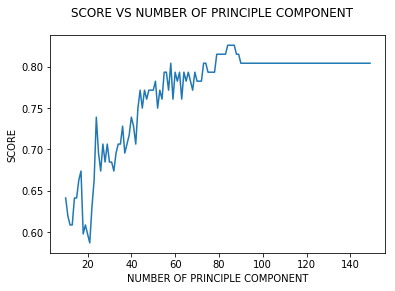

In [65]:
fig=plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS NUMBER OF PRINCIPLE COMPONENT')
plt.xlabel('NUMBER OF PRINCIPLE COMPONENT')
plt.ylabel('SCORE')

In [66]:
print('The hightest score:',max(scores))
print('The corresponding number of principle component:',index[np.argmax(scores)])

The hightest score: 0.8260869565217391
The corresponding number of principle component: 84


In [67]:
pca = PCA(n_components=84)
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train_pca,y_train)

svm_pred2=clf.predict(X_test_pca)
print('Accuracy of the best:',clf.score(X_test_pca,y_test))

pca_svm_pred=clf.predict(X_test_pca)

Accuracy of the best: 0.8260869565217391


In [68]:
print(confusion_matrix(y_test,pca_svm_pred))

[[47  2  1  2]
 [ 7  8  0  0]
 [ 1  0 11  0]
 [ 2  1  0 10]]


In [69]:
print('Predict Label:',pca_svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 4 2 1 1 1 1 1 3 1 2 3 3 4 1 1 1 1 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1 1 2 3 3
 1 4 1 2 1 4 1 4 1 2 1 1 4 1 4 3 1 1 1 1 3 1 1 4 1 2 1 1 1 2 1 1 1 1 1 1 1
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 1 3 1 1]
Real Label: [1 1 2 1 2 1 1 1 3 1 1 3 3 4 1 1 1 1 1 3 1 1 4 1 1 2 2 1 2 1 1 1 2 1 2 3 3
 1 4 1 2 1 4 1 4 1 4 1 3 1 1 4 3 1 1 1 4 3 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 4
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 2 1 1 2]


# sub-01/ses-retest Data (Threshold=800)

In [70]:
fmri_mask=spio.loadmat('refMRImask800.mat')
label=spio.loadmat('label.mat')
fmri_ROI=fmri_mask['fMRIdata_1D_ROI']
label=label['label']

In [71]:
fmri_ROI_df=pd.DataFrame(fmri_ROI)
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14368,14369,14370,14371,14372,14373,14374,14375,14376,14377
0,1151,1391,1398,1229,1057,997,1151,1238,1372,1361,...,2302,2323,2208,1716,1850,2481,1965,2485,2157,1772
1,1070,1283,1281,1090,954,933,1083,1148,1227,1179,...,1270,1379,1329,1026,964,1389,1079,1357,1213,1106
2,1070,1273,1267,1110,953,935,1065,1155,1214,1160,...,1177,1283,1266,970,917,1305,1006,1259,1127,1008
3,1039,1268,1281,1121,955,946,1073,1146,1208,1135,...,1167,1280,1243,924,902,1304,950,1221,1087,1008
4,1052,1261,1267,1109,934,960,1066,1143,1210,1133,...,1200,1327,1258,902,911,1294,956,1260,1107,1029


In [72]:
fmri_ROI_df['label']=label
fmri_ROI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14369,14370,14371,14372,14373,14374,14375,14376,14377,label
0,1151,1391,1398,1229,1057,997,1151,1238,1372,1361,...,2323,2208,1716,1850,2481,1965,2485,2157,1772,1
1,1070,1283,1281,1090,954,933,1083,1148,1227,1179,...,1379,1329,1026,964,1389,1079,1357,1213,1106,1
2,1070,1273,1267,1110,953,935,1065,1155,1214,1160,...,1283,1266,970,917,1305,1006,1259,1127,1008,1
3,1039,1268,1281,1121,955,946,1073,1146,1208,1135,...,1280,1243,924,902,1304,950,1221,1087,1008,1
4,1052,1261,1267,1109,934,960,1066,1143,1210,1133,...,1327,1258,902,911,1294,956,1260,1107,1029,2


## SVM only

The hightest score: 0.6739130434782609
The corresponding C: 0.01


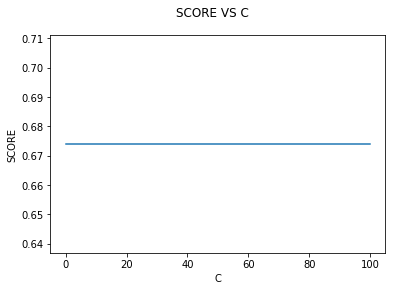

In [73]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']

scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=100)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

The hightest score: 0.6739130434782609
The corresponding C: 0.01


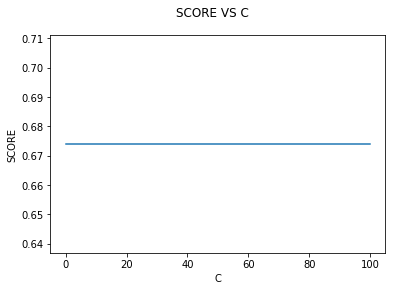

In [74]:
scores=[]
index=[]

for c in [0.01,0.1,1,10,100]:
    clf=SVC(kernel='linear',C=c,gamma=0.01)
    clf.fit(X_train,y_train)
    index.append(c)
    scores.append(clf.score(X_test,y_test))
    
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS C')
plt.xlabel('C')
plt.ylabel('SCORE')

print('The hightest score:',max(scores))
print('The corresponding C:',index[np.argmax(scores)])

In [75]:
scores=[]
index=[]
# save all scores of random state within range [1,150) 
for i in range(1,150):
    train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=i)
    X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_train=train['label']
    X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
    y_test=test['label']
    clf=SVC(kernel='linear',C=0.01,gamma=0.01)
    clf.fit(X_train,y_train)
    index.append(i)
    scores.append(clf.score(X_test,y_test))

Text(0,0.5,'SCORE')

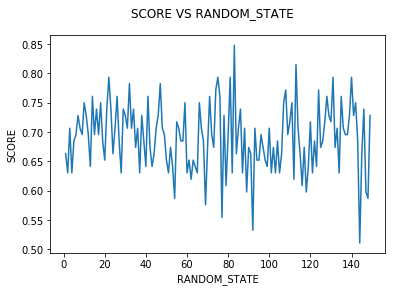

In [76]:
fig = plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS RANDOM_STATE')
plt.xlabel('RANDOM_STATE')
plt.ylabel('SCORE')

In [77]:
print('The hightest score:',max(scores))
print('The corresponding random state:',index[np.argmax(scores)])

The hightest score: 0.8478260869565217
The corresponding random state: 83


In [78]:
train,test=train_test_split(fmri_ROI_df,test_size=0.5,random_state=83)
X_train=train[train.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_train=train['label']
X_test=test[test.columns[0:(fmri_ROI_df.shape[1]-1)]]
y_test=test['label']


In [79]:
clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train,y_train)

svm_pred=clf.predict(X_test)
print('Accuracy of the best:',clf.score(X_test,y_test))

Accuracy of the best: 0.8478260869565217


In [80]:
print(confusion_matrix(y_test,svm_pred))

[[45  4  1  2]
 [ 3 12  0  0]
 [ 1  0 11  0]
 [ 2  1  0 10]]


In [81]:
print('Predict Label:',svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 4 2 1 2 1 1 1 3 1 2 3 3 4 1 1 1 1 1 3 1 1 4 1 1 2 1 1 2 1 1 1 2 1 2 3 3
 1 4 1 2 1 4 1 4 1 2 4 1 2 1 4 3 1 1 1 1 3 1 1 4 1 2 1 1 1 2 1 2 1 1 1 1 1
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 1 3 1 1]
Real Label: [1 1 2 1 2 1 1 1 3 1 1 3 3 4 1 1 1 1 1 3 1 1 4 1 1 2 2 1 2 1 1 1 2 1 2 3 3
 1 4 1 2 1 4 1 4 1 4 1 3 1 1 4 3 1 1 1 4 3 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 4
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 2 1 1 2]


## PCA+SVM

In [82]:
# Standardizing the features
scale=StandardScaler()
scale.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [83]:
scores=[]
index=[]
# save all scores of the number of dimensionality reduction within range [10,150) 
for i in range(10,150):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_pca= pca.transform(X_train)
    X_test_pca=pca.transform(X_test)

    clf2=SVC(kernel='linear',C=0.01,gamma=0.01)
    clf2.fit(X_train_pca,y_train)
    
    
    index.append(i)
    scores.append(clf2.score(X_test_pca,y_test))
    

Text(0,0.5,'SCORE')

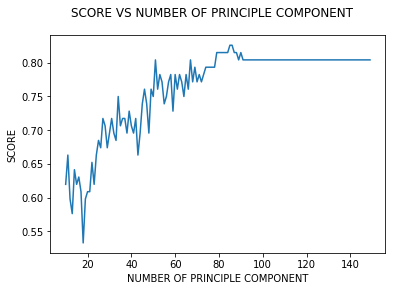

In [84]:
fig=plt.figure()
plt.plot(index,scores)
fig.suptitle('SCORE VS NUMBER OF PRINCIPLE COMPONENT')
plt.xlabel('NUMBER OF PRINCIPLE COMPONENT')
plt.ylabel('SCORE')

In [85]:
print('The hightest score:',max(scores))
print('The corresponding number of principle component:',index[np.argmax(scores)])

The hightest score: 0.8260869565217391
The corresponding number of principle component: 85


In [86]:
pca = PCA(n_components=85)
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_test_pca=pca.transform(X_test)

clf=SVC(kernel='linear',C=0.01,gamma=0.01)
clf.fit(X_train_pca,y_train)

svm_pred2=clf.predict(X_test_pca)
print('Accuracy of the best:',clf.score(X_test_pca,y_test))

pca_svm_pred=clf.predict(X_test_pca)

Accuracy of the best: 0.8260869565217391


In [87]:
print(confusion_matrix(y_test,pca_svm_pred))

[[47  2  1  2]
 [ 7  8  0  0]
 [ 1  0 11  0]
 [ 2  1  0 10]]


In [88]:
print('Predict Label:',pca_svm_pred)
print('Real Label:',np.transpose(y_test.tolist()))

Predict Label: [1 4 2 1 1 1 1 1 3 1 2 3 3 4 1 1 1 1 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1 1 2 3 3
 1 4 1 2 1 4 1 4 1 2 1 1 4 1 4 3 1 1 1 1 3 1 1 4 1 2 1 1 1 2 1 1 1 1 1 1 1
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 1 3 1 1]
Real Label: [1 1 2 1 2 1 1 1 3 1 1 3 3 4 1 1 1 1 1 3 1 1 4 1 1 2 2 1 2 1 1 1 2 1 2 3 3
 1 4 1 2 1 4 1 4 1 4 1 3 1 1 4 3 1 1 1 4 3 1 1 4 1 1 1 1 1 2 1 1 1 1 1 1 4
 4 1 1 4 1 3 1 2 3 2 2 2 4 3 2 1 1 2]
